# Sebastian Garcia

# Running Models

- Use Random Forest on the ‘Breast Cancer’ dataset to predict a diagnosis:
- Clean and preprocess data.
- Run the model on the data.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [2]:
bc_data = pd.read_csv('data-breast-cancer.csv')


In [3]:
bc_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
bc_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
bc_data.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
bc_data.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
# Isolate independent and dependent variables
bc_y = bc_data['diagnosis']
bc_x = bc_data.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1)


In [8]:
# Assign independent and dependent variables
X = bc_x
y = bc_y  # Variable: Diagnosis


In [9]:
# Split data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


### Random Forest

In [10]:
# Checking distribution
bc_data['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
# Build Random Forest model
rfc = RandomForestClassifier(n_estimators=100, max_depth=3)
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
# Evaluating the model
scores_f = cross_val_score(rfc, X_train, y_train, cv=3, scoring='roc_auc')
scores_f.mean()


0.9851242429788115

# Feature Selection

- Create plots to understand the data further:
- Are there any features that can be removed (or added)?
- Run the model again, and compare results from part 1.

In [13]:
# Checking for feature importance
f_imp = rfc.feature_importances_
f_names = list(X_train)


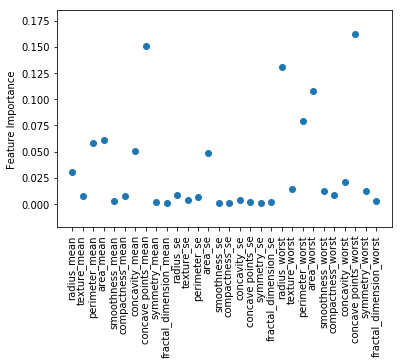

In [14]:
plt.scatter(range(1, len(f_imp)+1), f_imp)
plt.xticks(range(1, len(f_imp)+1), f_names, rotation=90)
plt.ylabel('Feature Importance')
plt.show()


In [15]:
# Putting feature importance in a data frame
f_imp_df = pd.DataFrame(f_imp, f_names)
f_imp_df = f_imp_df.rename(columns={0: 'Feature Importance'})
f_imp_df = f_imp_df.sort_values('Feature Importance', ascending=False)
f_imp_df.head(10)


,Feature Importance
concave points_worst,0.161832
concave points_mean,0.150964
radius_worst,0.130357
area_worst,0.107899
perimeter_worst,0.079018
area_mean,0.060713
perimeter_mean,0.058227
concavity_mean,0.050355
area_se,0.049038
radius_mean,0.030400


In [16]:
# Chedcking correlations
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1,0.32,1,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,0.68,-0.097,0.67,0.74,-0.22,0.21,0.19,0.38,-0.1,-0.043,0.97,0.3,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.0071
texture_mean,0.32,1,0.33,0.32,-0.023,0.24,0.3,0.29,0.071,-0.076,0.28,0.39,0.28,0.26,0.0066,0.19,0.14,0.16,0.0091,0.054,0.35,0.91,0.36,0.34,0.078,0.28,0.3,0.3,0.11,0.12
perimeter_mean,1,0.33,1,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,0.69,-0.087,0.69,0.74,-0.2,0.25,0.23,0.41,-0.082,-0.0055,0.97,0.3,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.051
area_mean,0.99,0.32,0.99,1,0.18,0.5,0.69,0.82,0.15,-0.28,0.73,-0.066,0.73,0.8,-0.17,0.21,0.21,0.37,-0.072,-0.02,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.0037
smoothness_mean,0.17,-0.023,0.21,0.18,1,0.66,0.52,0.55,0.56,0.58,0.3,0.068,0.3,0.25,0.33,0.32,0.25,0.38,0.2,0.28,0.21,0.036,0.24,0.21,0.81,0.47,0.43,0.5,0.39,0.5
compactness_mean,0.51,0.24,0.56,0.5,0.66,1,0.88,0.83,0.6,0.57,0.5,0.046,0.55,0.46,0.14,0.74,0.57,0.64,0.23,0.51,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.68,0.3,0.72,0.69,0.52,0.88,1,0.92,0.5,0.34,0.63,0.076,0.66,0.62,0.099,0.67,0.69,0.68,0.18,0.45,0.69,0.3,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1,0.46,0.17,0.7,0.021,0.71,0.69,0.028,0.49,0.44,0.62,0.095,0.26,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.15,0.071,0.18,0.15,0.56,0.6,0.5,0.46,1,0.48,0.3,0.13,0.31,0.22,0.19,0.42,0.34,0.39,0.45,0.33,0.19,0.091,0.22,0.18,0.43,0.47,0.43,0.43,0.7,0.44
fractal_dimension_mean,-0.31,-0.076,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1,0.00011,0.16,0.04,-0.09,0.4,0.56,0.45,0.34,0.35,0.69,-0.25,-0.051,-0.21,-0.23,0.5,0.46,0.35,0.18,0.33,0.77


In [19]:
# Isolate independent and dependent variables
bc_x_new = bc_data.drop(['diagnosis', 'id', 'Unnamed: 32',
                         'area_mean', 'radius_worst', 'radius_mean',
                         'texture_worst', 'concavity_worst',
                         'concave points_worst', 'perimeter_mean',
                         'concavity_mean', 'area_se', 'perimeter_se'], axis=1)


In [20]:
# Assign updated independent variables
X_new = bc_x_new


In [21]:
# Split new data train and test
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.25, random_state=42)


In [22]:
# Build Random Forest model
rfc_new = RandomForestClassifier(n_estimators=100, max_depth=3)
rfc_new.fit(X_train_new, y_train_new)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
# Evaluate the model
scores_f_new = cross_val_score(rfc, X_train_new, y_train_new, cv=3, scoring='roc_auc')
scores_f_new.mean()


0.9850446375992274

# Hyperparameter Tuning

- Using Grid Search and Random Search, tune the hyperparameters of the three models:
- Run both Grid Search and Random Search
- Compare with previous results in part 1 and 2.

In [24]:
param_grid_random = {
    'n_estimators': [400, 600, 800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [5, 6, 7],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6]
}


In [25]:
# Build Randomized Search model
rfc_rs = RandomizedSearchCV(rfc, param_grid_random, n_iter=100, cv=3, scoring='roc_auc', n_jobs=-1)
rfc_rs.fit(X_train, y_train)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [400, 600, 800], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 6, 7], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 4, 6]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [26]:
# Checking for best parameters
rfc_rs.best_params_


{'n_estimators': 400,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 7}

In [27]:
# Best Model RandomSearch
# Applying best model
rfc_rs.best_estimator_


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
# Evaluate RandomSearch model
scores_rs = cross_val_score(rfc_rs.best_estimator_, X_train, y_train, cv=5, scoring='roc_auc')
scores_rs.mean()


0.986831408782489

In [29]:
param_grid = {
    'n_estimators': [200, 400, 600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6]
}


In [30]:
# Build Grid Search model
rfc_gs = GridSearchCV(rfc, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
rfc_gs.fit(X_train, y_train)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [200, 400, 600], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [31]:
# Checking for best parameters
rfc_gs.best_params_


{'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200}

In [32]:
# Best Model GridSearch
# Applying best model
rfc_gs.best_estimator_


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
# Evaluate GridSearch model
scores_gs = cross_val_score(rfc_gs.best_estimator_, X_train, y_train, cv=3, scoring='roc_auc')
scores_gs.mean()


0.9871682228370803